In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from time import time
from dateutil.parser import parse
import impute as imp
import calplot

# Importo datos de anio incompleto

In [2]:
path_archivo='../../01_weather_data/03_imputing_process/01_test_data/'#camino para llegar a archivo a importar
nombre_archivo='tmx_incomplete_solar_angles.csv'# archivo a importar
tmx_inc=pd.read_csv(path_archivo+nombre_archivo,parse_dates=True)
tmx_inc

,time,Ib,Ig,to,RH,P,WS,WD,alturasolar,azimuth
0,2018-01-01 00:00:00,0.0,0.0,18.70,36.34,87864.11,1.422,316.0,-79.806160,166.773196
1,2018-01-01 00:10:00,0.0,0.0,18.95,35.29,87876.37,1.008,283.7,-81.878940,170.053742
2,2018-01-01 00:20:00,0.0,0.0,18.94,35.43,87888.64,1.565,326.0,-83.764991,173.367191
3,2018-01-01 00:30:00,0.0,0.0,18.77,35.89,87887.21,2.175,354.5,-85.236372,176.703016
4,2018-01-01 00:40:00,0.0,0.0,18.81,36.34,87886.91,1.902,348.0,-85.827949,-179.949903
...,...,...,...,...,...,...,...,...,...,...
52555,2018-12-31 23:10:00,0.0,0.0,18.51,47.29,87484.32,1.715,332.2,-68.725457,151.345160
52556,2018-12-31 23:20:00,0.0,0.0,18.26,48.02,87470.70,1.703,320.5,-71.001501,154.338568
52557,2018-12-31 23:30:00,0.0,0.0,18.39,46.84,87455.03,2.887,335.7,-73.264218,157.400817
52558,2018-12-31 23:40:00,0.0,0.0,17.99,47.85,87470.02,1.528,358.8,-75.506650,160.527038


In [3]:
isteps,datavoids,idates=imp.void_identifier(tmx_inc,'Ig')

new_void_at: 2018-01-30 07:20:00
at index 4220
67
new_void_at: 2018-03-29 06:40:00
at index 12568
73
new_void_at: 2018-06-15 06:10:00
at index 23797
79
new_void_at: 2018-06-27 06:10:00
at index 25525
79
new_void_at: 2018-07-28 06:20:00
at index 29990
78
new_void_at: 2018-08-12 06:30:00
at index 32151
76
new_void_at: 2018-10-05 06:40:00
at index 39928
70
new_void_at: 2018-11-14 06:50:00
at index 45689


In [4]:
isteps

[4220, 12568, 23797, 25525, 29990, 32151, 39928, 45689]

In [5]:
idates

['2018-01-30 07:20:00',
 '2018-03-29 06:40:00',
 '2018-06-15 06:10:00',
 '2018-06-27 06:10:00',
 '2018-07-28 06:20:00',
 '2018-08-12 06:30:00',
 '2018-10-05 06:40:00',
 '2018-11-14 06:50:00']

In [6]:
datavoids

[67, 73, 79, 79, 78, 76, 70, 67]

In [7]:
tmx_inc=pd.read_csv(path_archivo+nombre_archivo,index_col=0,parse_dates=True)
tmx_inc

,Ib,Ig,to,RH,P,WS,WD,alturasolar,azimuth
time,,,,,,,,,
2018-01-01 00:00:00,0.0,0.0,18.70,36.34,87864.11,1.422,316.0,-79.806160,166.773196
2018-01-01 00:10:00,0.0,0.0,18.95,35.29,87876.37,1.008,283.7,-81.878940,170.053742
2018-01-01 00:20:00,0.0,0.0,18.94,35.43,87888.64,1.565,326.0,-83.764991,173.367191
2018-01-01 00:30:00,0.0,0.0,18.77,35.89,87887.21,2.175,354.5,-85.236372,176.703016
2018-01-01 00:40:00,0.0,0.0,18.81,36.34,87886.91,1.902,348.0,-85.827949,-179.949903
...,...,...,...,...,...,...,...,...,...
2018-12-31 23:10:00,0.0,0.0,18.51,47.29,87484.32,1.715,332.2,-68.725457,151.345160
2018-12-31 23:20:00,0.0,0.0,18.26,48.02,87470.70,1.703,320.5,-71.001501,154.338568
2018-12-31 23:30:00,0.0,0.0,18.39,46.84,87455.03,2.887,335.7,-73.264218,157.400817


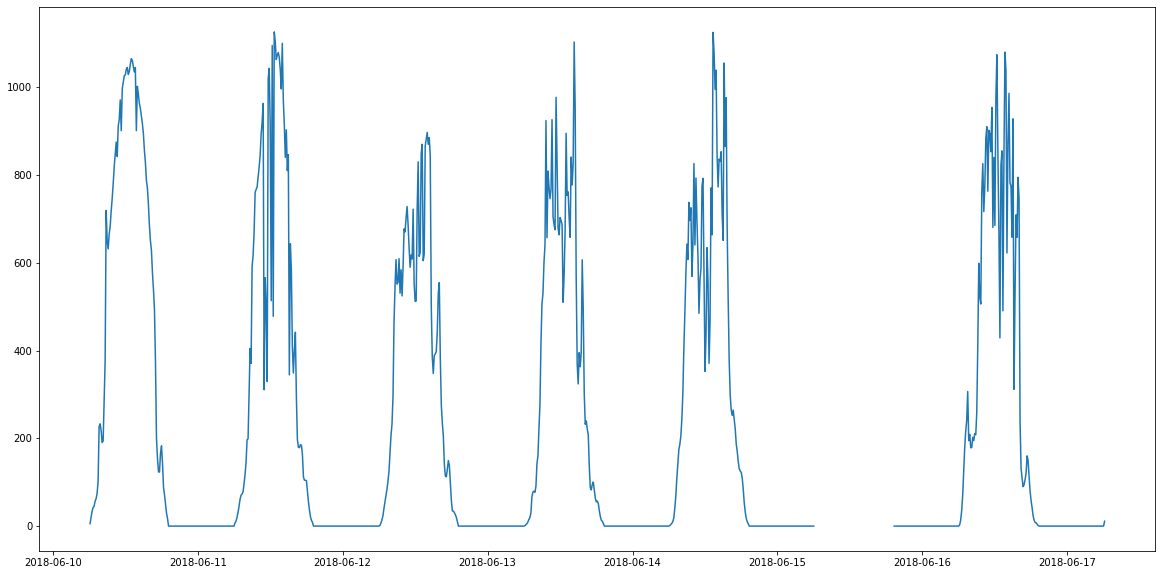

In [10]:
i=2 #hasta 7
fecha1=parse(idates[i])-pd.Timedelta('5D')
fecha2=parse(idates[i])+pd.Timedelta('2D')
plt.figure(figsize=(20,10))
plt.plot(tmx_inc.Ig[fecha1:fecha2])

## Train the data

In [11]:

fecha1=parse(idates[i])-pd.Timedelta('5D')
fecha2=parse(idates[i])
train_data=tmx_inc.Ig.loc[fecha1:fecha2]
train_data = train_data.asfreq(pd.infer_freq(train_data.index))
my_order = (0,0,0)
my_seasonal_order = (0, 1,1, 144)
# define model


In [10]:
model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
start = time()
model_fit = model.fit()
end = time()
print('training_time:', end-start)

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.05727D+00    |proj g|=  1.62227D-01


 This problem is unconstrained.


KeyboardInterrupt: 

In [12]:
model_fit.summary()

NameError: name 'model_fit' is not defined

In [16]:
predictions = model_fit.forecast(steps=datavoids[i])
predictions = np.array(predictions)

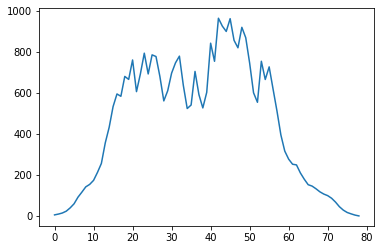

In [18]:
plt.plot(predictions)

In [19]:
nombres=['time','Ib','Ig','To','RH','WS','WD','P','Eg']
imputed=imp.exporta(path_archivo+nombre_archivo,predictions,isteps[i],datavoids[i],nombres)

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [31]:
#Falta ponerle el exporta, y hacerlo un loop. Despu'es hacer EPW, simular y sacar m'etricas

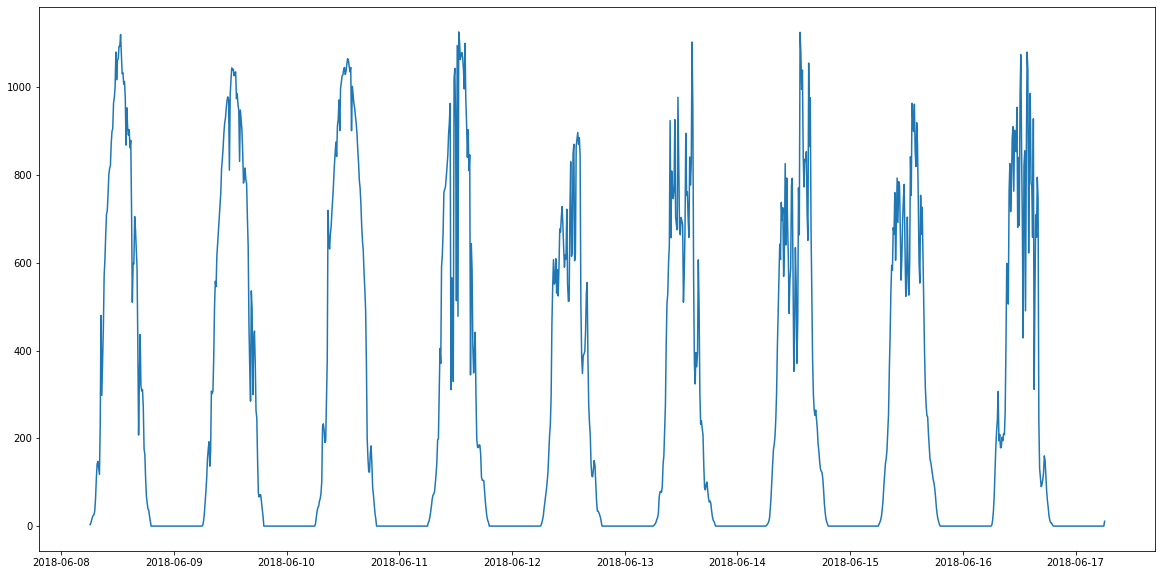

In [20]:
plt.figure(figsize=(20,10))
plt.plot(imputed.Ig.loc[parse(idates[i])-pd.Timedelta('7D'):parse(idates[i])+pd.Timedelta('2D')])

## Imputation cycle

3 years for training 2 years for testing with 1H sample 

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.71671D+00    |proj g|=  5.37064D-01

At iterate    5    f=  4.51936D+00    |proj g|=  5.88621D-04

At iterate   10    f=  4.51793D+00    |proj g|=  1.85172D-04

At iterate   15    f=  4.51783D+00    |proj g|=  1.19361D-04

At iterate   20    f=  4.51779D+00    |proj g|=  1.91812D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     24     28      1     0     0   6.372D-06   4.518D+00
  F =   4.5177876615844079     

CONVERG

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


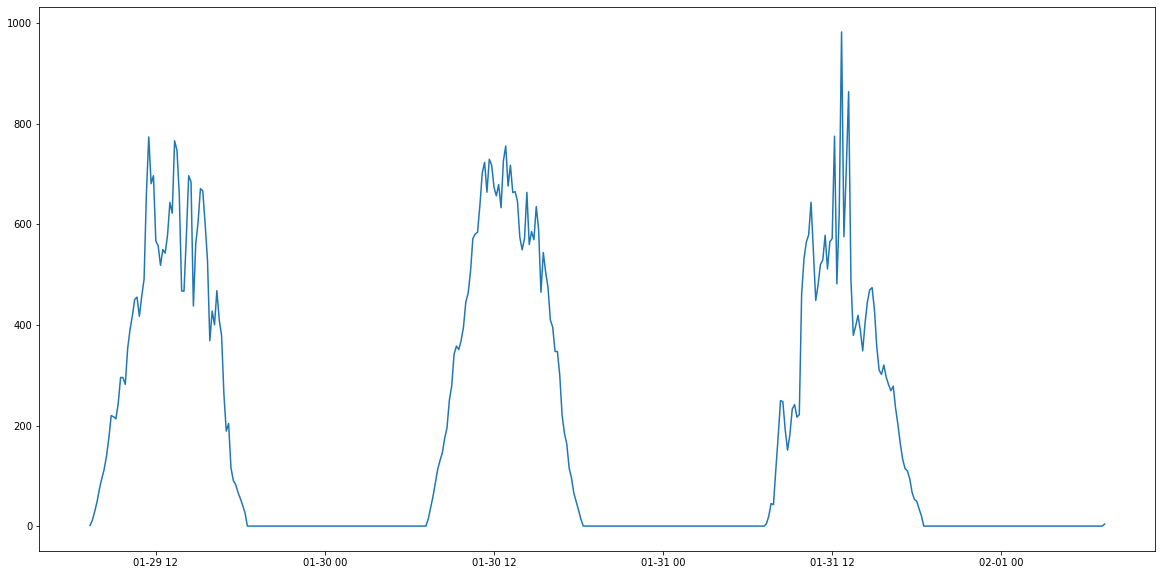

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.98656D+00    |proj g|=  9.47412D-02


 This problem is unconstrained.



At iterate    5    f=  2.80796D+00    |proj g|=  1.04433D-01

At iterate   10    f=  2.78785D+00    |proj g|=  9.19415D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     13     18      1     0     0   7.447D-07   2.788D+00
  F =   2.7878403287389304     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 237.7471570968628
                                       SARIMAX Results                                       
Dep. Variable:                                    Ig   No. Observations:                  721
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 144)   Log Likelihood         

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


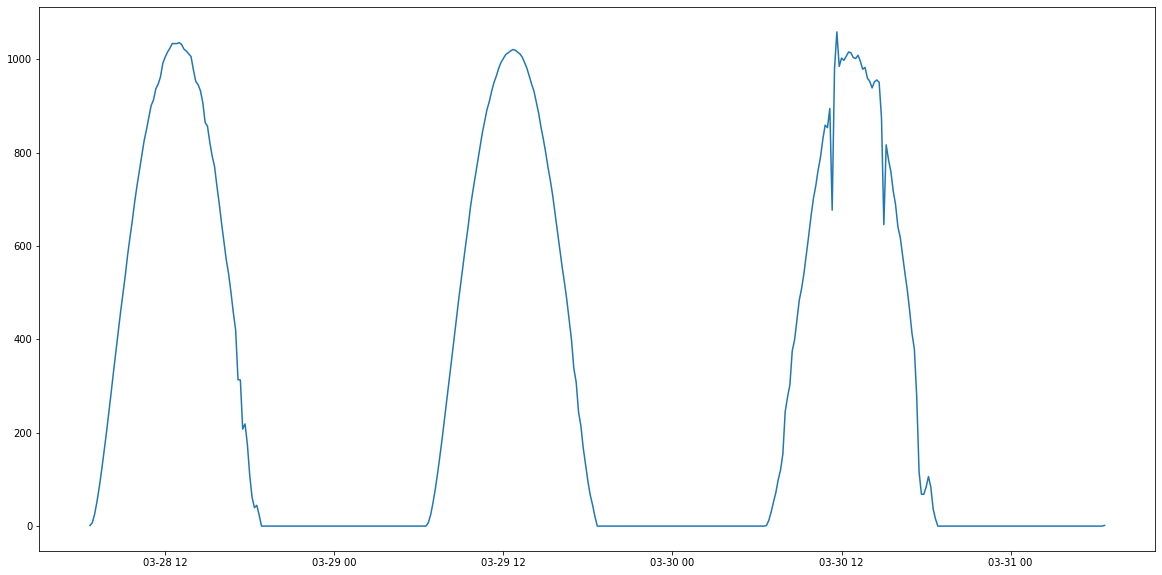

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.02550D+00    |proj g|=  4.67615D-01


 This problem is unconstrained.



At iterate    5    f=  4.86706D+00    |proj g|=  1.82871D-03

At iterate   10    f=  4.86605D+00    |proj g|=  5.38933D-04

At iterate   15    f=  4.86600D+00    |proj g|=  4.29655D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     17     21      1     0     0   1.139D-06   4.866D+00
  F =   4.8660027568902091     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 244.1523380279541
                                       SARIMAX Results                                       
Dep. Variable:                                    Ig   No. Observations:                  721
Model:          

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


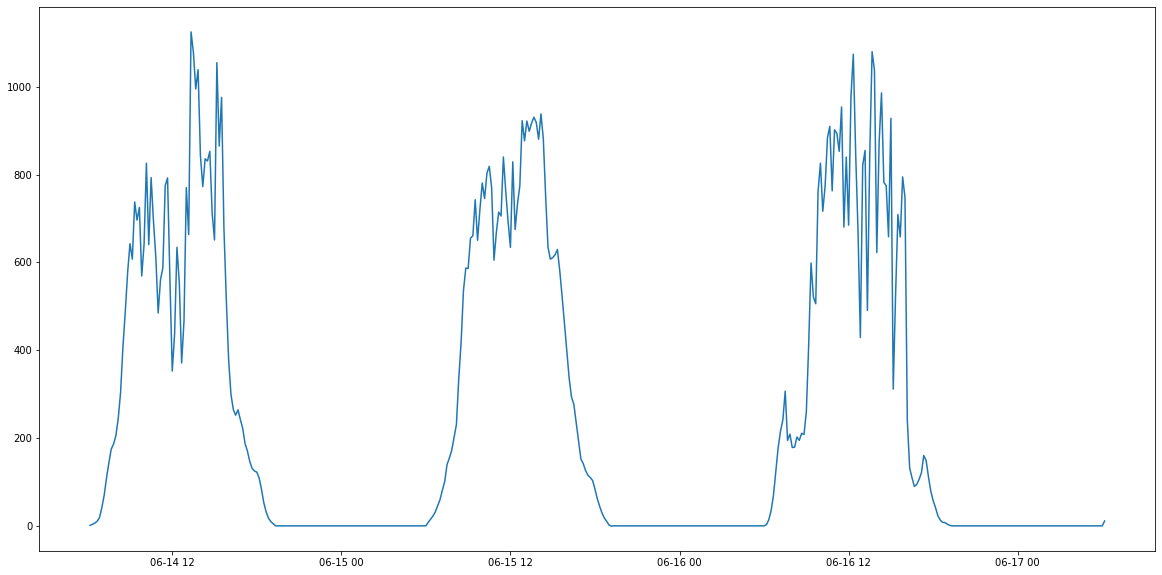

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.91696D+00    |proj g|=  5.71250D-01

At iterate    5    f=  4.71111D+00    |proj g|=  2.35101D-03

At iterate   10    f=  4.70988D+00    |proj g|=  9.26268D-05

At iterate   15    f=  4.70885D+00    |proj g|=  1.76490D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     18     31      1     0     0   7.714D-06   4.709D+00
  F =   4.7088036151756922     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


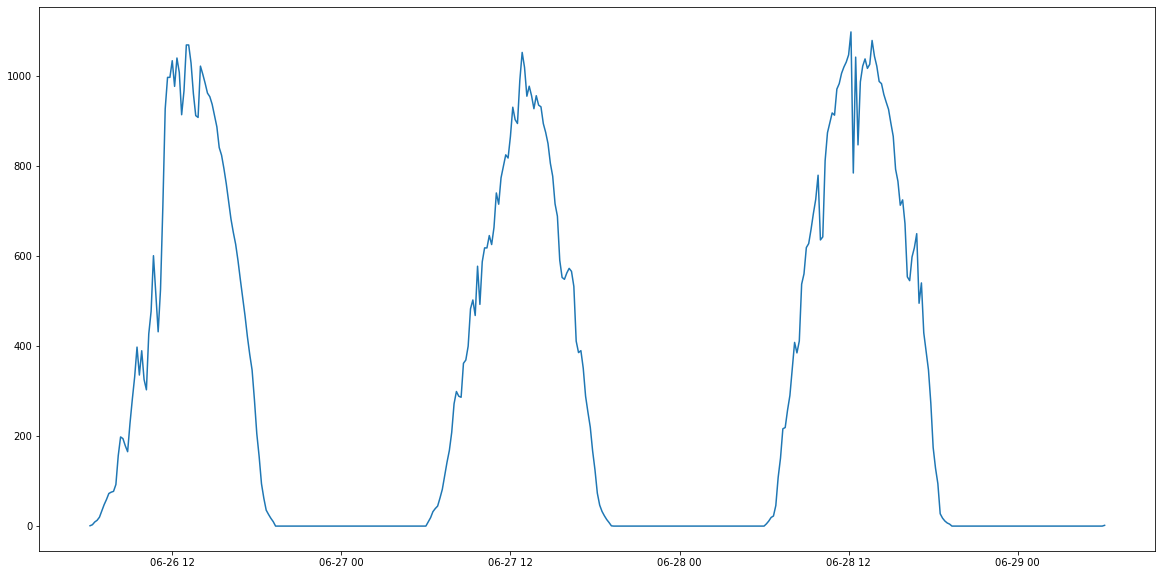

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.73176D+00    |proj g|=  1.86038D-01

At iterate    5    f=  3.67223D+00    |proj g|=  1.62568D-02

At iterate   10    f=  3.66921D+00    |proj g|=  1.91604D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     11     15      1     0     0   3.084D-07   3.669D+00
  F =   3.6692080696872718     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 189.47489190101624
                                    

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


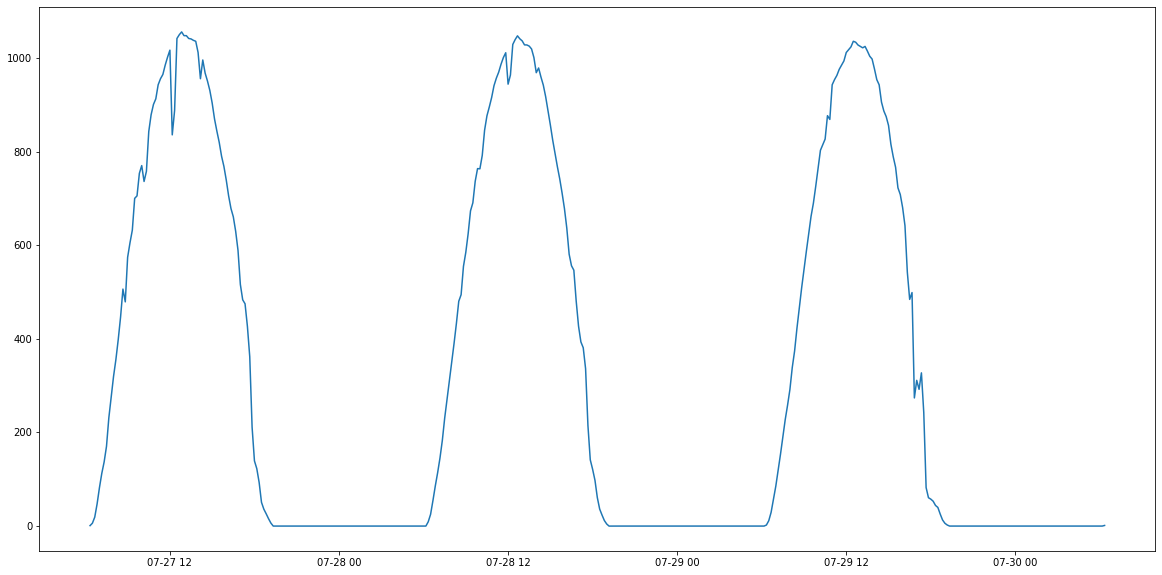

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.69590D+00    |proj g|=  4.02761D-02


 This problem is unconstrained.



At iterate    5    f=  4.68646D+00    |proj g|=  4.01863D-02

At iterate   10    f=  4.56196D+00    |proj g|=  3.43933D-03

At iterate   15    f=  4.53034D+00    |proj g|=  1.19811D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     18     31      1     0     0   5.624D-07   4.530D+00
  F =   4.5301712951053261     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 365.9424138069153
                                       SARIMAX Results                                       
Dep. Variable:                                    Ig   No. Observations:                  721
Model:          

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


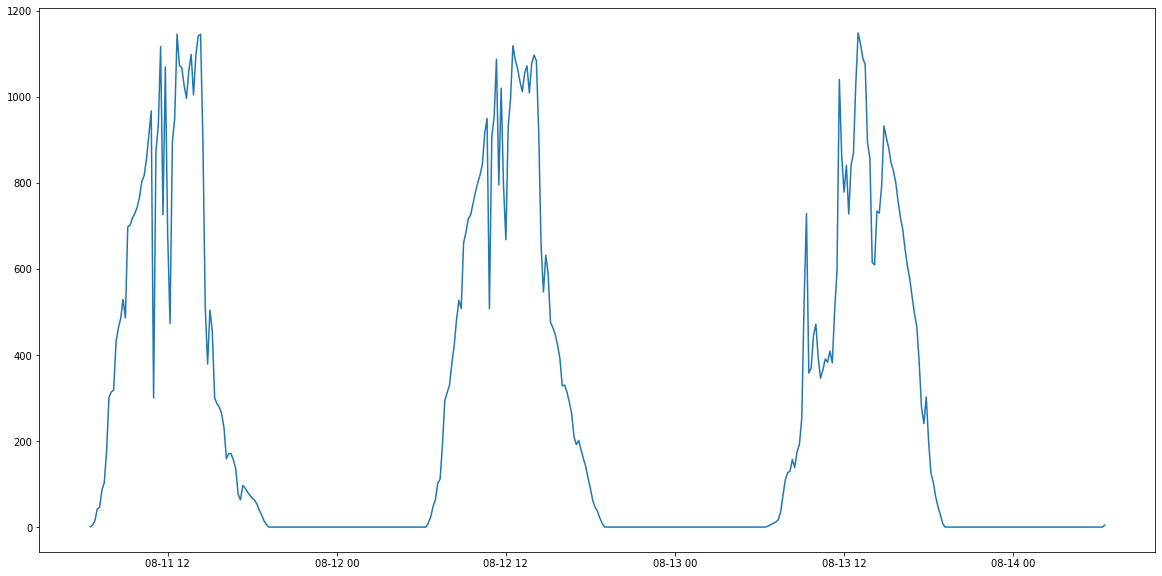

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.65659D+00    |proj g|=  4.57261D-01


 This problem is unconstrained.



At iterate    5    f=  4.46824D+00    |proj g|=  7.37922D-04

At iterate   10    f=  4.46764D+00    |proj g|=  7.87010D-05

At iterate   15    f=  4.46757D+00    |proj g|=  4.11306D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     18     23      1     0     0   4.232D-06   4.468D+00
  F =   4.4675543598216949     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 272.174596786499
                                       SARIMAX Results                                       
Dep. Variable:                                    Ig   No. Observations:                  721
Model:           

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


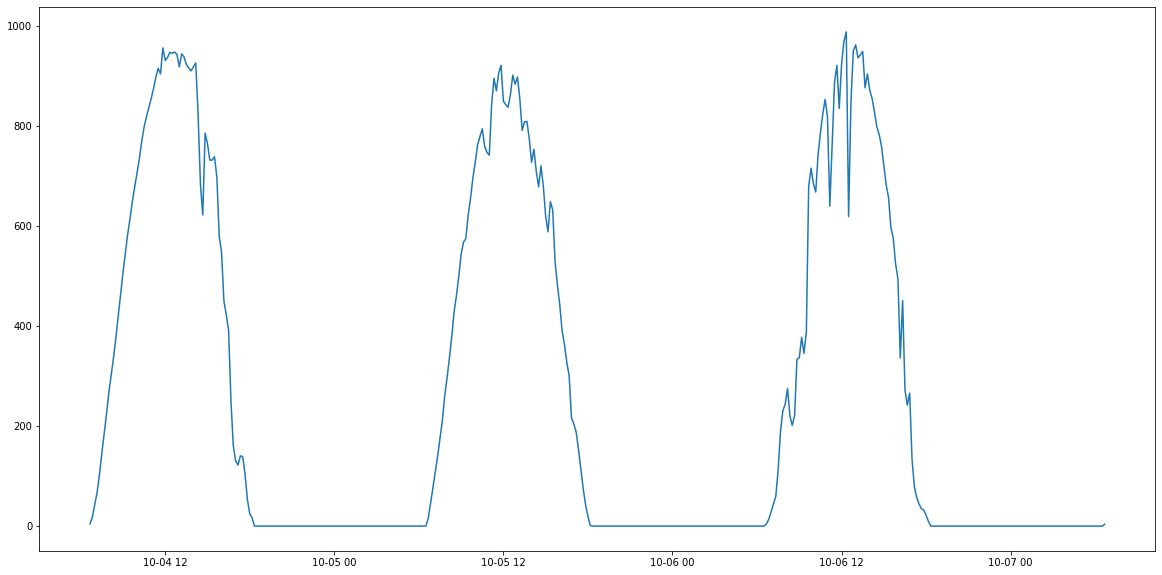

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.19436D+00    |proj g|=  5.95953D-02

At iterate    5    f=  4.06918D+00    |proj g|=  8.81949D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      9     14      1     0     0   5.071D-06   4.069D+00
  F =   4.0686361123613830     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 175.40955805778503
                                       SARIMAX Results                                       
Dep.

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


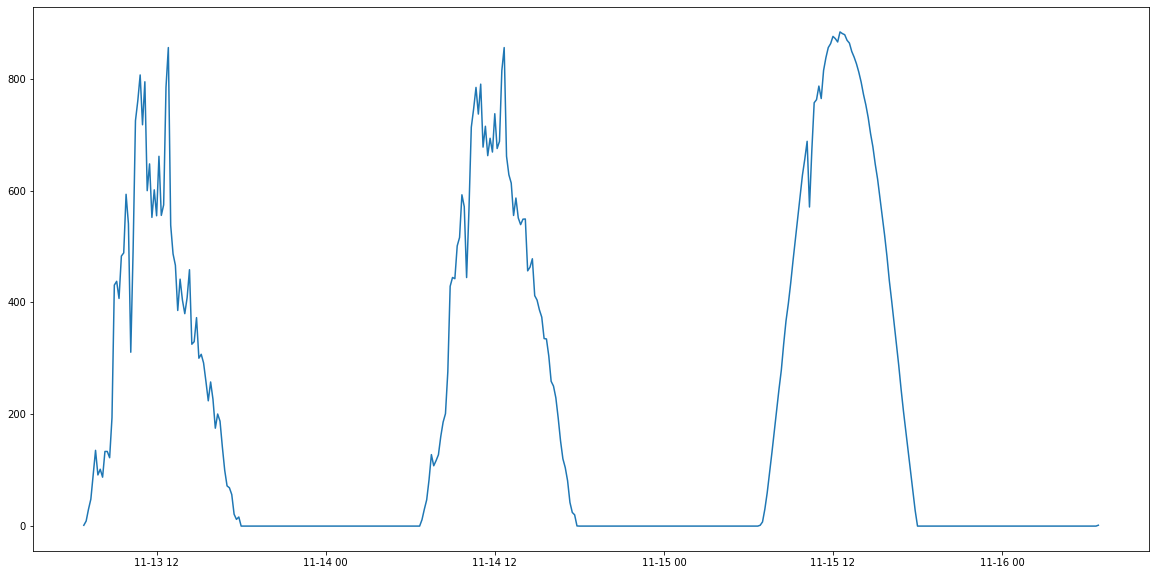

In [13]:
path_imputed_file='../../01_weather_data/03_imputing_process/02_imputed_data/Tmx_SARIMA_0_1_1.csv'
tmx_inc.to_csv(path_imputed_file) #Export the incomplete data to what it will become the imputed data
for i in range(len(idates)):
    fecha1=parse(idates[i])-pd.Timedelta('5D')
    fecha2=parse(idates[i])
    train_data=tmx_inc.Ig.loc[fecha1:fecha2]
    train_data = train_data.asfreq(pd.infer_freq(train_data.index))
    my_order = (0,0,0)
    my_seasonal_order =(0, 1, 1, 144) #(2, 0, 1, 144)
    model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
    start = time()
    model_fit = model.fit()
    end = time()
    print('training_time:', end-start)
    print(model_fit.summary())
    predictions = model_fit.forecast(steps=datavoids[i]) #Hago predicci'on
    predictions = np.array(predictions)
    nombres=['time','Ib','Ig','To','RH','WS','WD','P','Eg']
    #Lo meto en el archivo con los indices correspondientes
    imputed=imp.exporta(path_imputed_file,'Ig',predictions,isteps[i],datavoids[i],nombres,path_exported_file=path_imputed_file,save=True)
    plt.figure(figsize=(20,10))
    plt.plot(imputed.Ig.loc[parse(idates[i])-pd.Timedelta('1D'):parse(idates[i])+pd.Timedelta('2D')])
    plt.show()

In [38]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:                          Ig   No. Observations:                  721
Model:             SARIMAX(0, 1, [1], 144)   Log Likelihood               -3321.078
Date:                     Tue, 21 Sep 2021   AIC                           6646.157
Time:                             18:07:11   BIC                           6654.873
Sample:                         11-09-2018   HQIC                          6649.556
                              - 11-14-2018                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L144     -0.4181      0.085     -4.894      0.000      -0.586      -0.251
sigma2      5687.9472    163.482     34.792      0.000    5367.528    6008.366
===================================================================================
Ljung-Box (L1) (Q):                 431.16   Jarque-Bera (JB):              3590.52
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              20.25   Skew:                            -3.00
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
imputed_csv=pd.read_csv('../../01_weather_data/03_imputing_process/02_imputed_data/Tmx_SARIMA_0_1_1.csv',index_col=0,parse_dates=True)
complete=pd.read_csv('../../01_weather_data/03_imputing_process/01_test_data/base_temixco.csv',index_col=0,parse_dates=True)
complete['mae']=np.abs(imputed_csv.Ig-complete.Ig)


In [15]:
dias=['2018-03-29',
'2018-01-30',
'2018-06-27',
'2018-06-15',
'2018-07-28',
'2018-08-12',
'2018-10-05',
'2018-11-14']

mae_day: 19.23396477665152


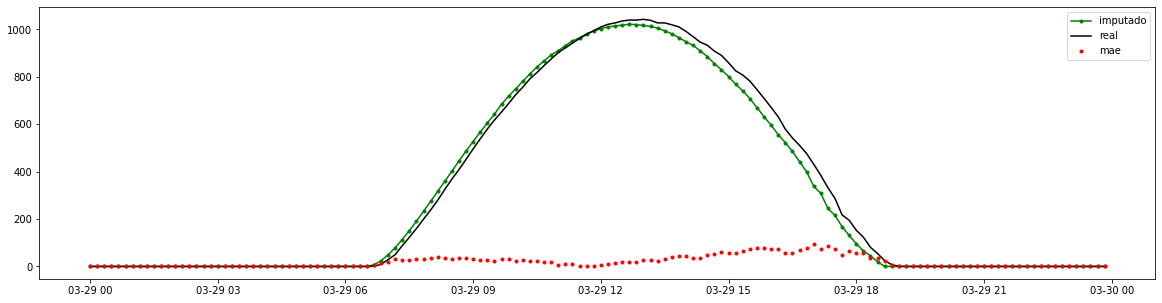

mae_day: 57.7680816165134


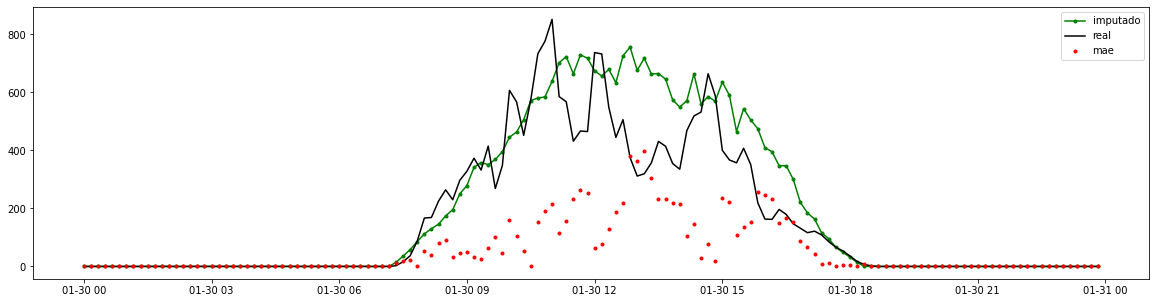

mae_day: 66.26109453978421


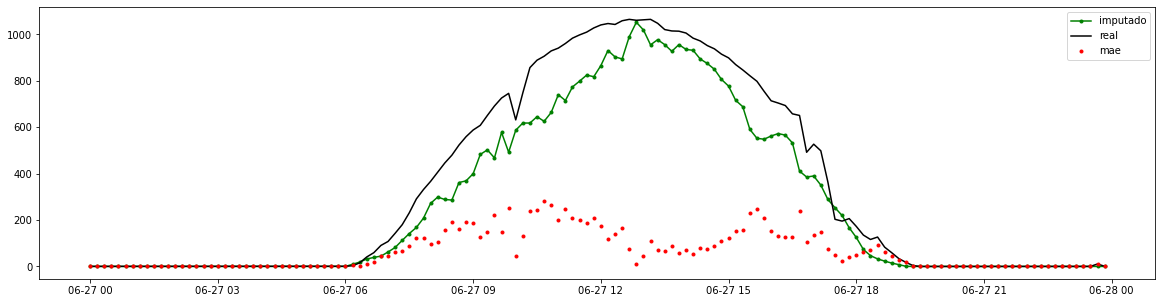

mae_day: 123.95833941987595


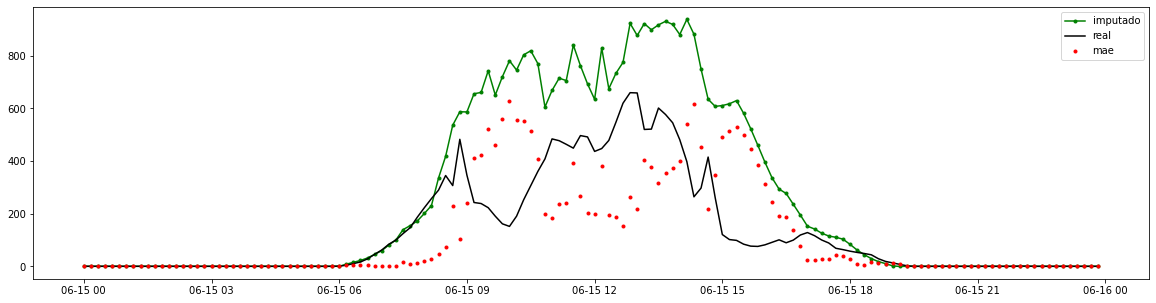

mae_day: 28.059615228769214


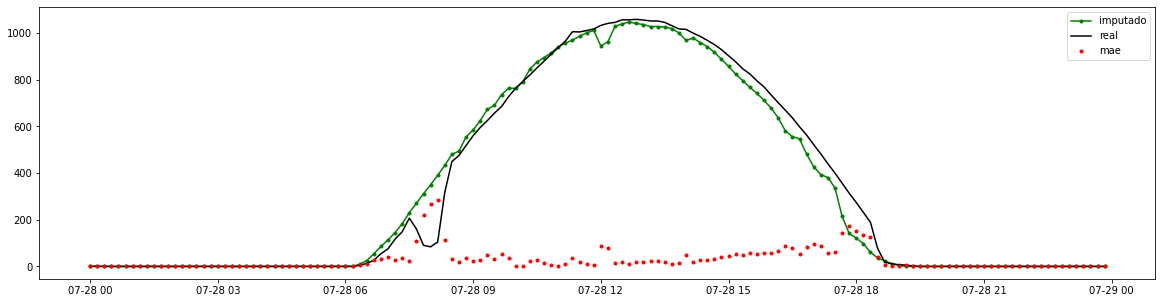

mae_day: 148.6053349686224


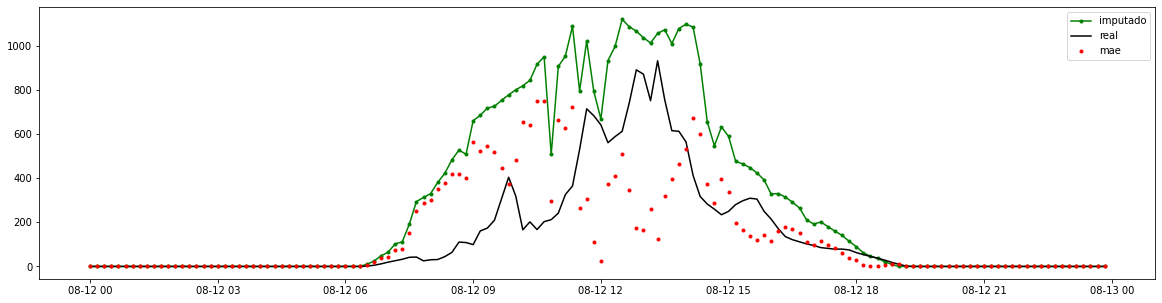

mae_day: 30.470688484673516


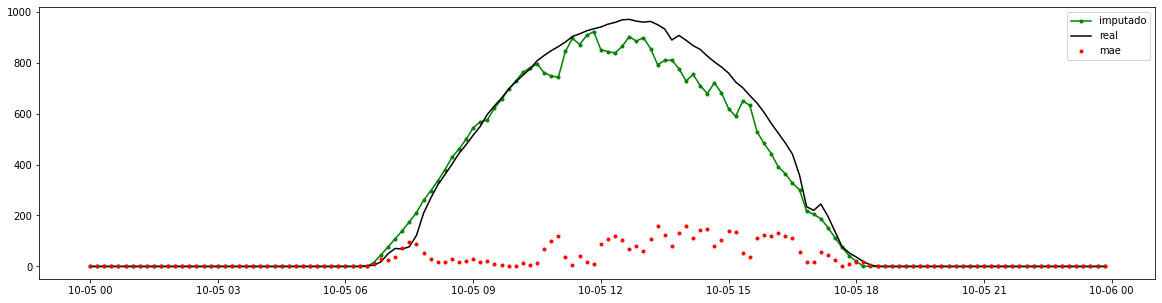

mae_day: 155.0230279565667


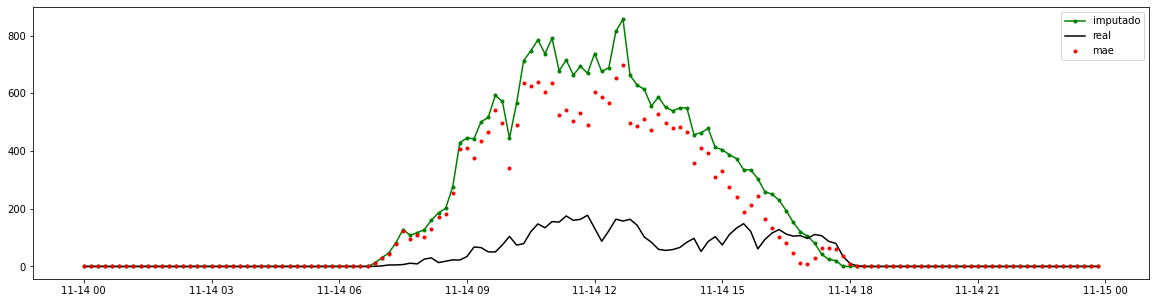

In [16]:

meyear=complete.mae.resample('D').mean()
for i in range(len(idates)):
    fig,ax=plt.subplots(figsize=(20,5))
    print('mae_day:',meyear[dias[i]])
    ax.plot(imputed.Ig.loc[dias[i]],'g.-',label='imputado')
    ax.plot(complete.Ig.loc[dias[i]],'k-',label='real')
    ax.plot(complete.mae.loc[dias[i]],'r.',label='mae')
    ax.legend()
    plt.show()

(<Figure size 900x122.4 with 2 Axes>,
 array([<AxesSubplot:ylabel='2018'>], dtype=object))

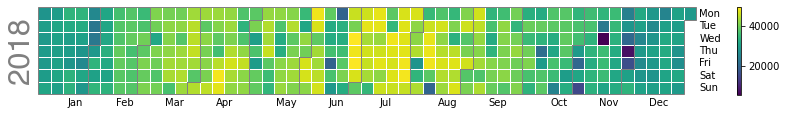

In [23]:
calplot.calplot(complete.Ig)